In [4]:
import gspread
from gspread_dataframe import get_as_dataframe

In [5]:
from google.colab import auth
auth.authenticate_user()

from google.auth.transport.requests import Request
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

sheet_url = "https://docs.google.com/spreadsheets/d/1GfMzK2TNaWutPzdexn_0eqPZWrhnX1T-2mDydX_GqXg/edit?usp=sharing"
spreadsheet = gc.open_by_url(sheet_url)

worksheet = spreadsheet.get_worksheet(0)
df = get_as_dataframe(worksheet)

In [6]:
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [7]:
df.columns

Index(['data', 'conversation'], dtype='object')

In [8]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords (can be extended)
custom_stopwords = set(stopwords.words('english'))

# Function to clean text
def advanced_cleaning(text):
    # Remove punctuation, numbers, and unwanted characters
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)  # Removes numbers
    # Convert to lowercase and strip extra spaces
    text = text.lower().strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Function to clean dataset
def clean_dataset(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Apply advanced cleaning to both columns
    df['cleaned_data'] = df['data'].apply(advanced_cleaning)
    df['cleaned_conversation'] = df['conversation'].apply(advanced_cleaning)

    return df

# Example dataset
# Ensure your dataset is already loaded as 'df' with columns 'data' and 'conversation'
df = clean_dataset(df)

# Preview the cleaned dataset
print(df[['cleaned_data', 'cleaned_conversation']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                        cleaned_data  \
0  yearold male hospitalized due moderate ards co...   
1  yearold man hospitalized due increasingly redu...   
2  one week positive covid result yearold male ad...   
3  yearold male admitted icu dry cough week oxyge...   
4  yearold male admitted icu dyspnea heavy dry co...   

                                cleaned_conversation  
0  doctor good morning feeling today patient im f...  
1  doctor hello feeling today patient great ive h...  
2  doctor hello feeling today patient great ive t...  
3  doctor hello feeling today patient good doctor...  
4  doctor good morning feeling today patient good...  


In [9]:
df.drop(columns=['cleaned_data', 'cleaned_conversation'], inplace=True)

In [10]:
df.columns

Index(['data', 'conversation'], dtype='object')

# Natural Language Processing: Text preparation

In [11]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define standard stopwords
custom_stopwords = set(stopwords.words('english'))

# Extend with custom stopwords or phrases
additional_stopwords = [
    'good morning', 'good evening', 'please', 'thank you',
    'regards', 'kindly', 'best wishes'
]
# Add individual words from phrases to stopwords
for phrase in additional_stopwords:
    custom_stopwords.update(phrase.split())

# Function to remove custom phrases
def remove_custom_phrases(text):
    # Replace defined phrases with empty strings
    for phrase in additional_stopwords:
        text = re.sub(rf'\b{phrase}\b', '', text, flags=re.IGNORECASE)
    return text

# Function to clean text
def advanced_cleaning(text):
    # Remove custom phrases first
    text = remove_custom_phrases(text)
    # Remove punctuation, numbers, and unwanted characters
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)  # Removes numbers
    # Convert to lowercase and strip extra spaces
    text = text.lower().strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Function to clean dataset
def clean_dataset(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Apply advanced cleaning to both columns
    df['cleaned_data'] = df['data'].apply(advanced_cleaning)
    df['cleaned_conversation'] = df['conversation'].apply(advanced_cleaning)

    return df

# Example dataset
# Ensure your dataset is already loaded as 'df' with columns 'data' and 'conversation'
df = clean_dataset(df)

# Preview the cleaned dataset
print(df[['cleaned_data', 'cleaned_conversation']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        cleaned_data  \
0  yearold male hospitalized due moderate ards co...   
1  yearold man hospitalized due increasingly redu...   
2  one week positive covid result yearold male ad...   
3  yearold male admitted icu dry cough week oxyge...   
4  yearold male admitted icu dyspnea heavy dry co...   

                                cleaned_conversation  
0  doctor feeling today patient im feeling bit be...  
1  doctor hello feeling today patient great ive h...  
2  doctor hello feeling today patient great ive t...  
3  doctor hello feeling today patient doctor ive ...  
4  doctor feeling today patient doctor im trouble...  


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import pandas as pd

In [13]:
# Word Cloud
def plot_word_cloud(text_data, title):
    text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()


In [14]:

# Bar Chart of Top N Frequent Words
def plot_top_words(text_data, n=10):
    all_words = ' '.join(text_data).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top {n} Most Frequent Words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()



In [15]:
# Word Length Distribution
def plot_word_length_distribution(text_data):
    all_words = ' '.join(text_data).split()
    word_lengths = [len(word) for word in all_words]
    plt.figure(figsize=(10, 6))
    sns.histplot(word_lengths, kde=True, color='blue', bins=30)
    plt.title("Word Length Distribution")
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.show()



In [16]:
# Message Length Distribution
def plot_message_length_distribution(text_data):
    message_lengths = [len(message.split()) for message in text_data]
    plt.figure(figsize=(10, 6))
    sns.histplot(message_lengths, kde=True, color='green', bins=30)
    plt.title("Message Length Distribution")
    plt.xlabel("Message Length (Number of Words)")
    plt.ylabel("Frequency")
    plt.show()



In [17]:
# Bigram or Trigram Frequency
def plot_ngrams(text_data, n=2, top_n=10):
    from nltk import ngrams
    all_words = ' '.join(text_data).split()
    ngram_counts = Counter(ngrams(all_words, n))
    common_ngrams = ngram_counts.most_common(top_n)
    ngrams_text, counts = zip(*[(f'{" ".join(ngram)}', count) for ngram, count in common_ngrams])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(ngrams_text), palette='mako')
    plt.title(f"Top {top_n} {n}-grams")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.show()


Some Basic visualizations to get a better idea from EDA


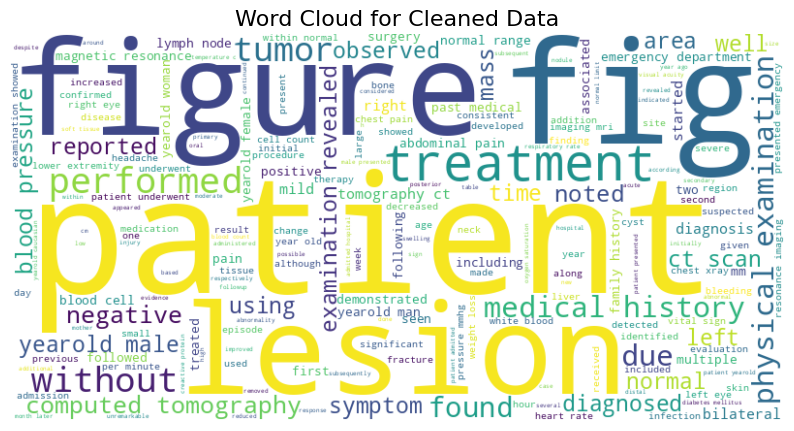

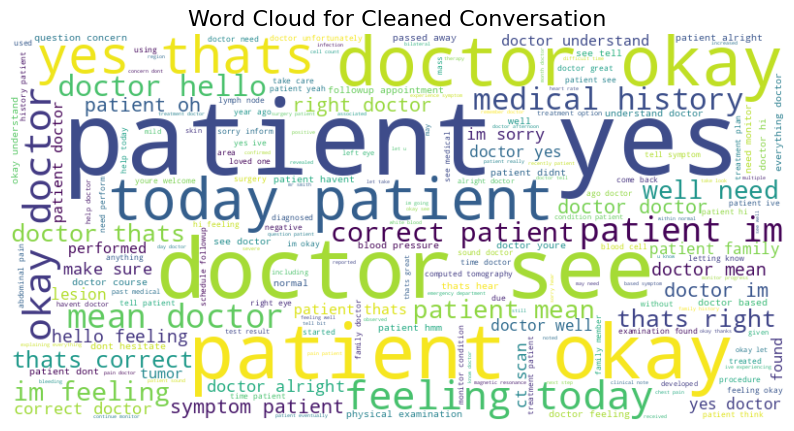

<ipython-input-14-3e53ff2fc3c8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


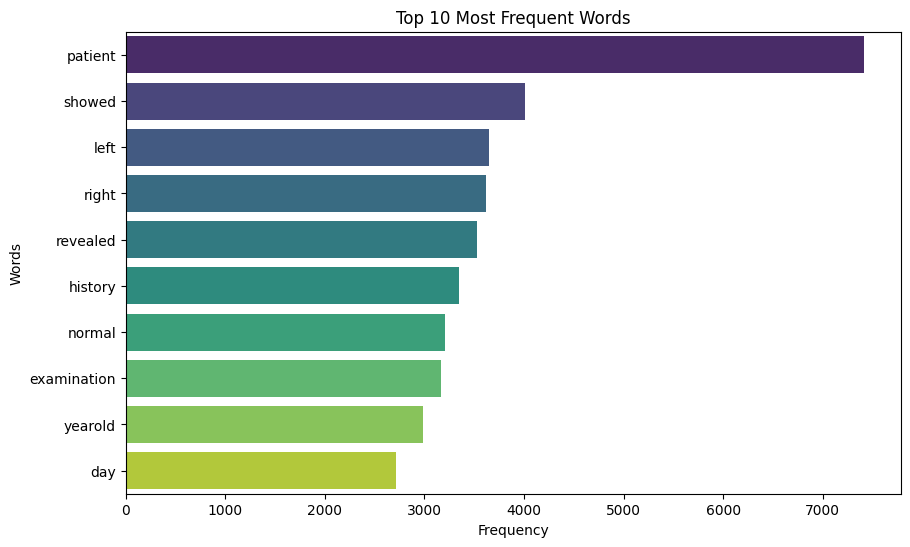

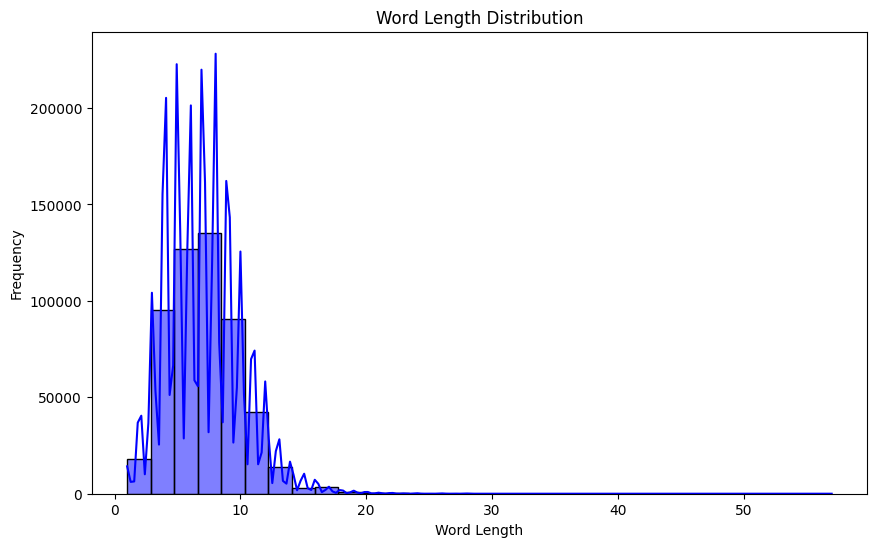

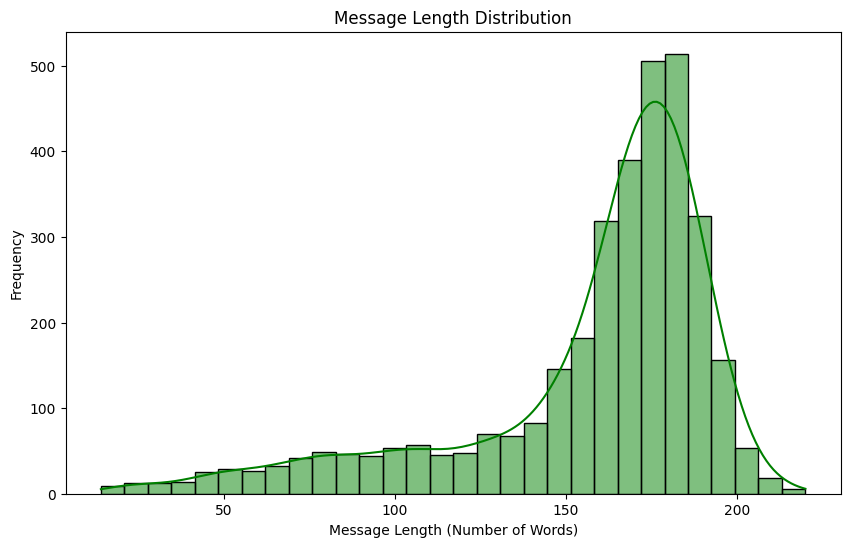

<ipython-input-17-262f0667d26a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams_text), palette='mako')


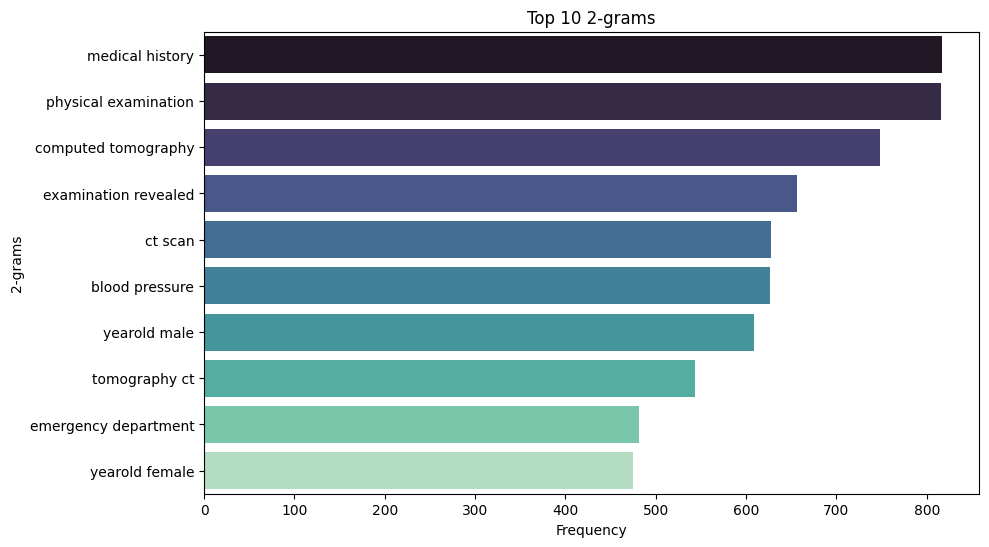

<ipython-input-17-262f0667d26a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(ngrams_text), palette='mako')


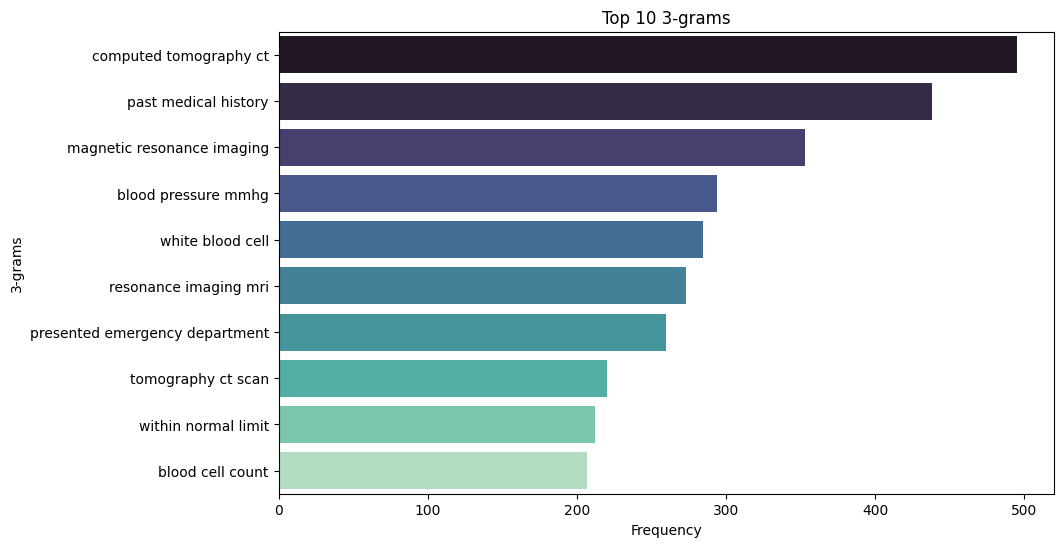

In [18]:


# Apply Visualizations
# Assuming cleaned columns are 'cleaned_data' and 'cleaned_conversation'
text_data = df['cleaned_data'].tolist()
text_conversation = df['cleaned_conversation'].tolist()

plot_word_cloud(text_data, title="Word Cloud for Cleaned Data")
plot_word_cloud(text_conversation, title="Word Cloud for Cleaned Conversation")

# Top 10 Frequent Words
plot_top_words(text_data, n=10)

# Word Length Distribution
plot_word_length_distribution(text_data)

# Message Length Distribution
plot_message_length_distribution(text_data)

# Top 10 Bigrams
plot_ngrams(text_data, n=2, top_n=10)

# Top 10 Trigrams
plot_ngrams(text_data, n=3, top_n=10)


Pre-trained model for sentiment analysis
> Using transformers



In [19]:
from transformers import pipeline

# Load Pretrained Model for Emotion Analysis
emotion_analyzer = pipeline("text-classification", model="bhadresh-savani/bert-base-go-emotion", return_all_scores=True)

# Apply Emotion Analysis on Cleaned Data
def analyze_emotions_pretrained(text_data):
    results = []
    for text in text_data:
        scores = emotion_analyzer(text)
        # Extract emotion with the highest score
        dominant_emotion = max(scores[0], key=lambda x: x['score'])
        results.append((text, dominant_emotion['label'], dominant_emotion['score']))
    return results

# Example Usage
text_data = df['cleaned_data'].tolist()
pretrained_emotions = analyze_emotions_pretrained(text_data)

# Convert results to a DataFrame for easier visualization
import pandas as pd
pretrained_emotions_df = pd.DataFrame(pretrained_emotions, columns=["Text", "Emotion", "Score"])
print(pretrained_emotions_df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                                Text  Emotion     Score
0  yearold male hospitalized due moderate ards co...  neutral  0.886954
1  yearold man hospitalized due increasingly redu...  neutral  0.543385
2  one week positive covid result yearold male ad...  neutral  0.694654
3  yearold male admitted icu dry cough week oxyge...  neutral  0.732164
4  yearold male admitted icu dyspnea heavy dry co...  neutral  0.809451


# Sentiment analysis using textblob and assigning to most prominenet emotions

In [20]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download necessary resources
nltk.download('vader_lexicon')

# Initializae VADER Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Define a Rule-Based Emotion Mapping Function
def map_sentiment_to_emotion(polarity):
    if polarity >= 0.5:
        return "Joy"
    elif 0 < polarity < 0.5:
        return "Neutral"
    elif -0.5 <= polarity < 0:
        return "Sadness"
    else:
        return "Anger"

# Apply Rule-Based Emotion Analysis
def analyze_emotions_rule_based(text_data):
    results = []
    for text in text_data:
        # VADER Sentiment Score
        scores = vader_analyzer.polarity_scores(text)
        emotion = map_sentiment_to_emotion(scores['compound'])
        results.append((text, emotion, scores['compound']))
    return results

# Example Usage
rule_based_emotions = analyze_emotions_rule_based(text_data)

# Convert results to a DataFrame for easier visualization
rule_based_emotions_df = pd.DataFrame(rule_based_emotions, columns=["Text", "Emotion", "Compound Score"])
print(rule_based_emotions_df.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                Text  Emotion  Compound Score
0  yearold male hospitalized due moderate ards co...  Sadness         -0.3382
1  yearold man hospitalized due increasingly redu...  Neutral          0.1531
2  one week positive covid result yearold male ad...      Joy          0.7506
3  yearold male admitted icu dry cough week oxyge...  Sadness         -0.3818
4  yearold male admitted icu dyspnea heavy dry co...      Joy          0.5916


                                                Text Rule-Based Emotion  \
0  yearold male hospitalized due moderate ards co...            Sadness   
1  yearold man hospitalized due increasingly redu...            Neutral   
2  one week positive covid result yearold male ad...                Joy   
3  yearold male admitted icu dry cough week oxyge...            Sadness   
4  yearold male admitted icu dyspnea heavy dry co...                Joy   

   Compound Score  
0         -0.3382  
1          0.1531  
2          0.7506  
3         -0.3818  
4          0.5916  


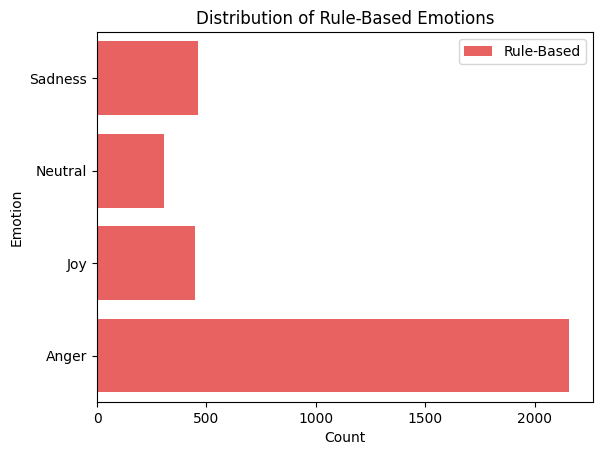

In [21]:
# Merge Results for Comparison
comparison_df = pd.DataFrame({
    "Text": text_data,
    "Pretrained Emotion": pretrained_emotions_df['Emotion'],
    "Pretrained Score": pretrained_emotions_df['Score'],
    "Rule-Based Emotion": rule_based_emotions_df['Emotion'],
    "Compound Score": rule_based_emotions_df['Compound Score']
})

# Display Comparison
print(comparison_df.head())

# Optional: Visualization of Agreement
import seaborn as sns
sns.countplot(y=comparison_df["Pretrained Emotion"], color="blue", alpha=0.5, label="Pretrained")
sns.countplot(y=comparison_df["Rule-Based Emotion"], color="red", alpha=0.5, label="Rule-Based")
plt.legend()
plt.show()


I have decided to go with rule based sentiment analysis.

In [22]:
import re
import spacy

# Sample list of keywords for physical challenges
keywords = [
    "pain", "injury", "dizziness", "weakness", "swelling",
    "headache", "back pain", "difficulty breathing"
]

# Load spaCy model for NER (use an appropriate model for your data, e.g., 'en_core_web_sm')
nlp = spacy.load("en_core_web_sm")

# Define a function for keyword matching
def keyword_matching(text, keywords):
    matched_keywords = [kw for kw in keywords if re.search(rf"\b{kw}\b", text, re.IGNORECASE)]
    return matched_keywords

# Define a function for NER-based concern extraction
def ner_detection(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["SYMPTOM", "DISEASE", "CONDITION"]]
    return entities

# Apply detection on the conversation data
def detect_physical_challenges(data):
    results = []
    for text in data:
        matched_keywords = keyword_matching(text, keywords)
        detected_entities = ner_detection(text)

        # Flag if any concern is detected
        flagged = bool(matched_keywords or detected_entities)
        results.append({
            "Text": text,
            "Keywords": matched_keywords,
            "Entities": detected_entities,
            "Flagged": flagged
        })
    return results

# Example usage
conversation_data = df['conversation'].tolist()  # Use the 'conversation' column
physical_challenge_results = detect_physical_challenges(conversation_data)

# Convert results to a DataFrame for visualization
import pandas as pd
challenge_df = pd.DataFrame(physical_challenge_results)
print(challenge_df.head())


                                                Text                Keywords  \
0  Doctor: Good morning, how are you feeling toda...  [difficulty breathing]   
1  Doctor: Hello, how are you feeling today?\nPat...                      []   
2  Doctor: Hello, how are you feeling today?\nPat...                      []   
3  Doctor: Hello, how are you feeling today?\nPat...                      []   
4  Doctor: Good morning, how are you feeling toda...                      []   

  Entities  Flagged  
0       []     True  
1       []    False  
2       []    False  
3       []    False  
4       []    False  




> Find the physical challenges mentined among other things by paitents as keywords.



In [23]:
import re
import pandas as pd

# Define keywords for physical challenges
keywords = [
    "oxygen desaturation", "difficulty", "coughing", "shortness of breath",
    "fatigue", "chest pain", "dizziness", "weakness"
]

# Define a function for keyword-based detection
def detect_physical_challenges(data, keywords):
    results = []
    for text in data:
        # Check if any keyword is found in the text
        matched_keywords = [kw for kw in keywords if re.search(rf"\b{kw}\b", text, re.IGNORECASE)]
        flagged = bool(matched_keywords)
        results.append({
            "Text": text,
            "Matched Keywords": matched_keywords,
            "Flagged": flagged
        })
    return results

# Example usage on summaries
summaries = df['data'].tolist()  # Assuming 'summary' column exists in your DataFrame
challenge_results = detect_physical_challenges(summaries, keywords)

# Convert results to a DataFrame for better visualization
challenge_df = pd.DataFrame(challenge_results)
print(challenge_df.head())

# Save flagged results to a CSV for review
challenge_df[challenge_df["Flagged"]].to_csv("flagged_summaries.csv", index=False)


                                                Text  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                              Matched Keywords  Flagged  
0  [oxygen desaturation, difficulty, coughing]     True  
1                                           []    False  
2                        [oxygen desaturation]     True  
3                                           []    False  
4                                           []    False  


In [24]:
df.columns

Index(['data', 'conversation', 'cleaned_data', 'cleaned_conversation'], dtype='object')



> Let us find out the general patterns for emotional concerns using concern and reassurance word lists custom made.



In [25]:
import pandas as pd
import re

# Define patterns for concerns and reassurances
concern_keywords = [
    "worse", "difficult", "can't", "struggle", "pain", "tired",
    "breathing", "scared", "fear", "weak"
]
reassurance_keywords = [
    "better", "normal", "okay", "fine", "don't worry", "understand",
    "help", "support", "improving", "safe"
]

# Helper function to identify patterns in dialogue
def analyze_conversation_structure(cleaned_conversations):
    results = []

    for conversation in cleaned_conversations:
        # Split the cleaned conversation into sentences
        sentences = re.split(r'[.!?]', conversation)

        patient_concerns = []
        doctor_reassurances = []

        for sentence in sentences:
            # Check for concerns
            if any(kw in sentence.lower() for kw in concern_keywords):
                patient_concerns.append(sentence.strip())

            # Check for reassurances
            if any(kw in sentence.lower() for kw in reassurance_keywords):
                doctor_reassurances.append(sentence.strip())

        # Add results to the output
        results.append({
            "Cleaned Conversation": conversation,
            "Patient Concerns": patient_concerns,
            "Doctor Reassurances": doctor_reassurances,
            "Concern Count": len(patient_concerns),
            "Reassurance Count": len(doctor_reassurances)
        })

    return results

# Example usage
cleaned_conversations = df['cleaned_data'].tolist()  # Using the 'cleaned_data' column from NLP step
conversation_analysis = analyze_conversation_structure(cleaned_conversations)

# Convert to DataFrame for better visualization
conversation_analysis_df = pd.DataFrame(conversation_analysis)
print(conversation_analysis_df.head())

# Save the analysis to a CSV
conversation_analysis_df.to_csv("cleaned_conversation_structure_analysis.csv", index=False)


                                Cleaned Conversation  \
0  yearold male hospitalized due moderate ards co...   
1  yearold man hospitalized due increasingly redu...   
2  one week positive covid result yearold male ad...   
3  yearold male admitted icu dry cough week oxyge...   
4  yearold male admitted icu dyspnea heavy dry co...   

                                    Patient Concerns  \
0  [yearold male hospitalized due moderate ards c...   
1  [yearold man hospitalized due increasingly red...   
2  [one week positive covid result yearold male a...   
3                                                 []   
4  [yearold male admitted icu dyspnea heavy dry c...   

                                 Doctor Reassurances  Concern Count  \
0  [yearold male hospitalized due moderate ards c...              1   
1                                                 []              1   
2  [one week positive covid result yearold male a...              1   
3  [yearold male admitted icu dry cough we

Combine Emotional and Physical Risk Scores

In [26]:
import pandas as pd

# Assuming your DataFrame is already prepared with the required columns:
# 'emotion_score' (from sentiment/emotion analysis) and 'physical_risk_score' (from keyword matching)

# Combine emotional and physical risk into an overall risk score
# Example keyword-based risk scoring
def calculate_physical_risk(text):
    keywords = ["oxygen desaturation", "difficulty", "coughing"]
    score = 0.0
    for word in keywords:
        if word in text.lower():  # Check for keywords in the text
            score += 0.5  # Increment score for each match (you can adjust the score value)
    return score

# Apply the function to your data
df['emotion_score'] = pretrained_emotions_df['Score']
df['physical_risk_score'] = df['conversation'].apply(calculate_physical_risk)


df['total_risk_score'] = df['emotion_score'] + df['physical_risk_score']

# Optional: Apply weights if needed (e.g., if emotion score is more important)
# df['total_risk_score'] = 0.7 * df['emotion_score'] + 0.3 * df['physical_risk_score']


Classify High-Risk vs Low-Risk

In [27]:
# Define high-risk category based on total risk score
df['risk_category'] = df['total_risk_score'].apply(lambda x: 'high-risk' if x > 1.0 else 'low-risk')

# Preview the updated DataFrame with risk categories
print(df[['total_risk_score', 'risk_category']].head())


   total_risk_score risk_category
0          2.386954     high-risk
1          0.543385      low-risk
2          1.194654     high-risk
3          0.732164      low-risk
4          1.309451     high-risk


Descriptive Statistics

In [28]:
# Aggregating data by risk category
aggregation = df.groupby('risk_category').agg(
    high_risk_count=('risk_category', 'size'),  # Count of patients in each risk category
    avg_emotion_score=('emotion_score', 'mean')  # Average emotion score in each category
).reset_index()

# Preview the aggregation results
print(aggregation)


  risk_category  high_risk_count  avg_emotion_score
0     high-risk              280           0.745305
1      low-risk             3097           0.729489




```
We have a count of the number patients who have a higher risk and the ones who are at low risk
```



Dashboards

In [29]:
!pip install dash

Let's extract the age of each patient correspoding to a tuple

In [30]:
import re
import pandas as pd

# Example DataFrame (assuming df already exists)
# Assuming df has a 'data' column containing the conversation texts

# Function to extract age from text using regular expressions
def extract_age(text):
    match = re.search(r'\b(\d{1,3})[- ]?year[- ]?old\b', text.lower())
    return int(match.group(1)) if match else None

# Apply the function to extract the age from the 'data' column and add it as a new column
df['age'] = df['data'].apply(extract_age)

# Print the age column to verify
print(df['age'])


0       60.0
1       39.0
2       57.0
3       69.0
4       57.0
        ... 
3372    50.0
3373    51.0
3374    69.0
3375    76.0
3376    20.0
Name: age, Length: 3377, dtype: float64


In [35]:
df.columns

Index(['data', 'conversation', 'cleaned_data', 'cleaned_conversation',
       'emotion_score', 'physical_risk_score', 'total_risk_score',
       'risk_category', 'age', 'age_group'],
      dtype='object')

In [36]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3377 entries, 0 to 3376
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   data                  3377 non-null   object  
 1   conversation          3377 non-null   object  
 2   cleaned_data          3377 non-null   object  
 3   cleaned_conversation  3377 non-null   object  
 4   emotion_score         3377 non-null   float64 
 5   physical_risk_score   3377 non-null   float64 
 6   total_risk_score      3377 non-null   float64 
 7   risk_category         3377 non-null   object  
 8   age                   3082 non-null   float64 
 9   age_group             3082 non-null   category
dtypes: category(1), float64(4), object(5)
memory usage: 267.3+ KB


In [39]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

# Sample DataFrame (replace with your actual dataset)
data = {
    "risk_category": ["High", "Medium", "Low", "High", "Low", "Medium", "High"],
    "emotion_score": [8.5, 5.0, 2.3, 7.8, 3.1, 4.5, 9.0],
    "physical_risk_score": [7.2, 5.5, 1.9, 8.0, 2.5, 5.0, 8.8],
    "total_risk_score": [7.85, 5.25, 2.1, 7.9, 2.8, 4.75, 8.9],
    "age_group": ["20-30", "30-40", "20-30", "40-50", "20-30", "30-40", "40-50"],
    "age": [25, 35, 29, 45, 22, 38, 48],
    "cleaned_conversation": [
        "anxiety", "breathing difficulty", "stress", "fatigue", "reassurance", "headache", "anxiety",
    ],
}
df = pd.DataFrame(data)

# Initialize Dash app
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Interactive Dashboard for Patient-Doctor Conversation Analysis", style={"text-align": "center"}),

    # Risk Category Distribution
    html.Div([
        html.H3("Risk Category Distribution"),
        dcc.Graph(id="risk-category-dist", figure=px.pie(df, names="risk_category", title="Risk Category Distribution")),
    ]),

    # Age Group vs Total Risk Score
    html.Div([
        html.H3("Age Group vs Total Risk Score"),
        dcc.Graph(id="age-risk-boxplot", figure=px.box(df, x="age_group", y="total_risk_score",
                                                       title="Total Risk Score by Age Group")),
    ]),

    # Emotional vs Physical Risk Correlation
    html.Div([
        html.H3("Correlation Between Emotional and Physical Risk Scores"),
        dcc.Graph(
            id="emotion-physical-scatter",
            figure=px.scatter(
                df,
                x="emotion_score",
                y="physical_risk_score",
                trendline="ols",
                title="Emotional vs Physical Risk Scores",
                labels={"emotion_score": "Emotion Score", "physical_risk_score": "Physical Risk Score"},
            ),
        ),
    ]),

    # Word Cloud Placeholder
    # Word Cloud Placeholder
    html.Div([
    html.H3("Top Emotional and Physical Indicators (Word Cloud Placeholder)"),
    dcc.Graph(
        id="word-cloud",
        figure=px.bar(
            df["cleaned_conversation"].value_counts().reset_index(name="count").rename(columns={"cleaned_conversation": "conversation"}),
            x="conversation",
            y="count",
            title="Top Emotional and Physical Indicators",
            labels={"conversation": "Keywords", "count": "Frequency"},
            ),
        ),
    ]),

    # Risk Category Trends Across Age
    html.Div([
        html.H3("Risk Category Trends Across Age"),
        dcc.Graph(
            id="risk-category-trends",
            figure=px.histogram(
                df,
                x="age_group",
                color="risk_category",
                barmode="group",
                title="Risk Category Trends Across Age",
                labels={"age_group": "Age Group", "risk_category": "Risk Category"},
            ),
        ),
    ]),
])

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>